# Estructura general para Aprendizaje Automático

El aprendizaje automático o estadístico consiste en una serie de técnicas que se basan en el principio general de aprendizaje: decimos que el sistema aprende si mejora su rendimiento en una tarea a partir de la experiencia. Esta definición de aprendizaje incorpora 3 elementos básicos: 

1) La <bb>tarea</bb> que responde al objetivo que el agente busca alcanzar o el problema que se quiere solucionar. Por ejemplo, la tarea puede ser la clasificación de e-mails, el reconocimiento de imágenes, etc.
2) El <b>rendimiento</b> que requiere de una medida cuantitativa para determinar qué tan bien resuelve la tarea nuestro sistema.
3) La <b>experiencia</b>; es decir, aquel material que enriquecerá los conocimientos (estados de creencia) de nuestro agente. En este caso la experiencia refiere a los datos con los que aprendemos.

Siempre que se aplique un algoritmo de aprendizaje automático, es importante seguir una metodología que nos permita determinar qué tan bien el modelo de aprendizaje generaliza. Esta metodología consistirá en los siguientes pasos:

1. Determinar el conjunto de datos (experiencia) con el que se va a trabajar. Este conjunto de datos debe ser idealmente representativo del problema, sea este supervisado o no supervisado (o de otro tipo). El conjunto de datos debe separarse en varios conjuntos:
    1. Datos de entrenamiento: Corresponden a aquellos datos con los que se aprenderá el modelo. Estos datos corresponden a la experiencia propiamente dicha, pues son aquellos datos que nuestro agente de aprendizaje verá y a partir de los cuales aprenderá. Generalmente se toma un 70\% del conjunto de datos original para el entrenamiento.
    2. Datos de validación: Son datos que pueden servir para ajustar hiperparámetros. No siempre son necesarios.
    3. Datos de evaluación: Son los datos con los que se determinará el rendimiento del agente de aprendizaje. Es importante que los datos de evaluación no deben haber sido vistos por el agente previamente (durante el entrenamiento), pues de otra forma no podremos decir que el agente está aprendiendo (si no memorizando). Generalmente, se usa un  30\% para los datos de evaluación.
2. Selección de los modelos: Después de que tenemos el problema a tratar, podemos pasar a hacer una selección de un modelo para que resuelva este problema. En primer lugar debemos determinar qué tipo de problemas estamos enfrentado; podemos pensar en los siguientes tipos de problemas:
    1. Supervisados: Cuando tenemos un indicador de la clase que deseamos de salida: $\mathcal{S} = \{x,y) : x \in \mathbb{R}^d. y \in Y\}$
    2. No-supervisados: Cuando sólo contamos con los datos del problema, pero no con una supervisión; es decir, el conjunto es de la forma $\mathcal{U} = \{x \in \mathbb{R}\}$
    3. Podemos hablar de otros tipos de aprendizaje; como el aprendizaje por refuerzo, donde el agente busca resolver una tarea con una función de recompensa; aprendizaje auto-supervisado donde el agente genera su propia supervisión; o aprendizaje semi-supervisado.
3. Entrenamiento del modelo: Una vez que se cuenta con los datos y se ha seleccionado un modelo adecuado para el problema, se procederá a entrenar el modelo. Este proceso es lo que se puede llamar aprendizaje propiamente dicho, pues es aquí donde el agente, a partir de la observación de los datos, aprende a resolver el problema. En este paso se podrán seleccionar hiperparámetros (valores del modelo que son elegidos por el programador) por lo que se puede usar una parte del dataset original (generalmente el 10\%) para poder determinar esos valores; a esto corresponde el paso de validación.
4. Evaluación del modelo: Este último paso es de suma importancia, pues determina la capacidad que el agente de aprendizaje tiene para generalizar. La evaluación del modelo consiste en determinar una medida numérica que nos indique qué tan bien el agente resuelve el problema para datos que no ha visto (de los que no ha aprendido). Según el tipo de problema se pueden utilizar diferentes métricas de evaluación.



## 1. Conjunto de datos


El conjunto de datos determina el problema que queremos resolver. Dentro del aprendizaje automático es importante contar con un conjunto de datos. Si tenemos un problema que no cuenta con uno, tendremos que conformar un conjunto de datos que represente adecuadamente al problema.

En este caso, utilizaremos un conjunto de datos ya disponible.
Utilizaremos el dataset de cáncer de mama de Wisconsin, disponible en https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).
Este dataset cuenta con las siguientes características:

<b>Características</b> | <b>Tipo de rasgos</b> | <b>Núm. rasgos</b> | <b>Núm. instancias</b>
--- | --- | --- | ---
Multivariable | Valores reales | 32 | 569 

Tomaremos el dataset desde la paqueterías de sklearn.

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

#Carga del dataset
data = load_breast_cancer()
#Entradas
x = data.data
#Salidas esperadas
y = data.target

El dataset cuenta con diferentes rasgos que describen características del tumor. Un total de 52 rasgos, entre ellos tenemos:

* mean radius: radio promedio del tumor.
* mean texture: textura del tumor en promedio.
* worst radius: el radio más alto del tumor.

En general cada rasgo describe características del tumor como radio, textura, perímetro, suavidad, concavidad, etc. Se toman varios valores, el valor medio, el mejor y el peor valor. La tabla siguiente describe estos rasgos:

In [2]:
data_descr = pd.DataFrame(data=x, columns=data.feature_names)
data_descr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Las estadísticas de los datos se ponen a continuación. En estas podemos ver los valores medios para cada rasgo, su desviación estándar.

In [3]:
#Datos estadísticos de los rasgos
data_descr.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Para terminar de preparar los datos, separamos estos en el conjunto de entrenamiento y de evaluación. Para esto utilizamos el 70% de los datos en entrenamiento y el 30% para la evaluación:

In [4]:
from sklearn.model_selection import train_test_split

# Separación de los datos en entrenamiento y evaluación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

print('Instancias en\nEntrenamiento: {}\nEvaluación: {}'.format(len(x_train), len(x_test)))

Instancias en
Entrenamiento: 398
Evaluación: 171


## 2. Selección de algoritmos

Ya que tenemos un problema que cuenta con un conjunto de datos supervisados (en donde teneos muestras de las salidas que deseamos obtener), se propone el uso de tres algoritmos supervisados. Cada uno de estos algoritmos pertenece a una familia específica en la que se enfoca en la clasificación supervisada:

1. <b>Algoritmos paramétricos</b>: Los algoritmos paramétricos dependen de un grupo de parámetros que describen una distribución probabilística. En este caso, tomamos dos algoritmos paramétricos:

    1.1. <b>Bayes Naïve</b>: El algoritmo de Bayes Naïve se basa en una red bayesiana simple. Se trata de un modelo gráfico dirigido y, por tanto, <b>generativo</b> cuyo modelo se describe como: $$\hat{y} = \arg\max_y p(y,x_1,x_2,...,x_d; \theta) = \arg\max_y \prod_{i=1}^d p(x_i|y)p(y)$$
    Es decir, estima una distribución conjunta que se factoriza asumiendo que los rasgos $x_i$ son generados por una clase $y$. En este caso, se estima un conjunto de parámetros que responde a los factores $p(x_i|y)$ y $p(y)$; por tanto, se trata de un algoritmo paramétrico.
    
    1.2. <b>Regresión logística</b>: La regresión logística es un modelo gráfico no dirigido y, por tanto, <b>discriminativo</b> en donde la clase se puede obtener como: $$\hat{y} = \arg\max_y p(y|x_1,...,x_d; \theta) = \arg\max_y \frac{1}{1+exp\{-\sum_{i=1}^d \theta_i x_i + \theta_0\}}$$. En este caso se estiman los parámetros $\theta_i$, $i=0,1,...,d$ que definen los factores de la distribución. Por tanto, es también un algoritmo paramétrico.
    
    
2. <b>Algoritmo no-paramétrico</b>: Para contrastar con los algoritmos paramétricos, tomamos un algoritmo no paramétrico: árboles de decisión, se trata de un algoritmo que construye un árbol binario donde cada nodo representa a un rasgo que se ramifica en dos casos: el dato contiene al rasgo o no lo contiene, o bien si son datos numéricos si el rasgo es mayor o no a un umbral. Para obtener el árbol de decisión minimizamos la impureza de Gini definida como: $$Gini = 1 - \sum_{i=1}^c p_i^2$$


Más adelante revisaremos los algoritmos y su implementación con más detalles; por ahora, simplemente cargamos estos algoritmos desde la paquetería de <tt>sklearn</tt>.

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Modelo de bayes naive
bayes_model = GaussianNB()
#Modelo de regresión con hiperparámetro de máximas iteraciones = 10000
logit_model = LogisticRegression(max_iter=10000)
#Modelo de árbol de decisión con impureza de gini
tree_model = DecisionTreeClassifier(criterion="gini")

## 3. Entrenamiento de los algoritmos

El entrenamiento es la parte central de todo el proceso de aprendizaje. Aquí es donde el agente aprenderá a partir de los datos de entrenamiento que ya hemos obtenido. En general, el problema de aprendizaje se convierte en un problema de optimización: se busca optimizar una función que determine qué tan bien realiza la tarea el agente. Esta función suele llamarse <b>función objetivo</b>. Cada algoritmo de aprendizaje tiene particularidades de su función objetivo y la forma de optimizarla. Posteriormente profundizaremos en esto.

La implementación de los algoritmos al problema se hará por medio del dataset de entrenamiento, que corresponde al 70% del conjunto original. En cada caso se hará uso de los métodos de entrenamiento:

1. Cálculo de probabilidades condicionales con estimación gaussiana para el modelo de bayes ingenuo.
2. Estimación de valores $\theta_i$ en regresión logística con algoritmo de gradiente descendiente con un número máximo de 10000 iteraciones.
3. Construcción de árbol de decisión con algoritmo ID3 usando impureza de Gini.

In [6]:
#Entrenamiento de bayes naïve
bayes_model.fit(x_train, y_train)
#Entrenamiento de regresión logística
logit_model.fit(x_train, y_train)
#Entrenamiento de árbol de decisión
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

El modelo de aprendizaje se almacena en la clase del modelo. Procedemos entonces a evaluar.

## 4. Evaluación de resultados

La evaluación consiste en determinar qué tan bien generaliza el modelo en datos nuevos. Podemos distinguir diferentes tipos de evaluación según el tipo de problema; en este caso, usaremos una evaluación supervisada: es decir, ya que contamos con las clases o salidas que esperamos del algoritmo, comparamos estos valores con los valores arrojados por el modelo. En este caso, usamos 3 de las métricas más populares para hacer evaluación supervisada (basadas en matriz de confusión). 
Para evaluar los resultados utilizamos, entonces, las métricas usuales:

* Precisión: $$Prec = \frac{TP}{TP+TN}$$
* Exhaustividad: $$Rec = \frac{TP}{TP+FN}$$
* Métrica F1: $$F_1 = \frac{2 Prec*Rec}{Prec + Rec}$$

Donde $TP$ son los verdaderos positivos y $TN$ los verdaderos negativos. Además, reportamos los promedios macro y pesado.

* Macro-Promedio: $\frac{1}{|C|}\sum_{c\in C} m(y, \hat{y})$
* Promedio ponderado: $\sum_{c \in C} p(c) m(y_c, \hat{y})$

Donde $m$ es una métrica (precisión, recall, $F_1$) y $C$ es el conjunto de clases y $p(c)$ es la probabilidad de la clase $c$.

In [7]:
bayes_pred = bayes_model.predict(x_test)
logit_pred = logit_model.predict(x_test)
tree_pred = tree_model.predict(x_test)

Para el modelo de bayes ingenuo tenemos los siguientes resultados:

In [8]:
from sklearn.metrics import classification_report

print('\t Resultados del modelo de Bayes Naïve')
print(classification_report(y_test, bayes_pred))

	 Resultados del modelo de Bayes Naïve
              precision    recall  f1-score   support

           0       0.98      0.91      0.95        68
           1       0.94      0.99      0.97       103

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



Para el modelo de regresión logística los resultados son:

In [9]:
print('\t Resultados del modelo de Regresión logística')

print(classification_report(y_test, logit_pred))

	 Resultados del modelo de Regresión logística
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        68
           1       0.96      0.99      0.98       103

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Finalmente para el modelo de árboles de decisión tenemos:

In [10]:
print('\t Resultados del modelo de Árbol de decisión')

print(classification_report(y_test, tree_pred))

	 Resultados del modelo de Árbol de decisión
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.95      0.97      0.96       103

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



A partir de la evaluación realizada se pueden tener los siguientes resultados donde se comparan los tres modelos que se usaron. Las evaluaciones que se muestran son para la clase 1:

|<b>Modelo</b> | <b>Accuracy</b> |<b>Precisión</b> |<b>Recall</b> |<b>F1</b>
|---- |---- |---- |---- |----
|Bayes Naïve | 0.88| 0.90 | 0.92 | 0.91
|Regresión logística | <b>0.94</b> | <b>0.94</b> | <b>0.96</b> | <b>0.95</b>
|Árboles de decisión | 0.89 | 0.92 | 0.91 | 0.92

Como se puede observar, en las evaluaciones se puede observar que el algoritmo con mejor desempeño es el de regresión logística.

## 5. Conclusiones 

Los tres modelos comparados muestran diferencias. El modelo de bayes naïve y el de regresión logística son modelos paramétricos, pero que se diferencian en que el primero es generativo y el segundo discriminativo. El modelo de regresión logística se puede interpretar por los parámetros o pesos que asigna a cada rasgo. Estos son los siguientes:

In [11]:
logit_weights = pd.DataFrame(data=logit_model.coef_, index=['Peso'], columns=data.feature_names)
logit_weights.T

,Peso
mean radius,0.603120
mean texture,0.258638
mean perimeter,-0.269741
mean area,0.021981
mean smoothness,-0.137305
mean compactness,-0.186978
mean concavity,-0.404731
mean concave points,-0.224105
mean symmetry,-0.250691
mean fractal dimension,-0.023903


Como se observa, el rasgo más resaltante para la clase cáncer es el de el error de textura radio promedio, así como la textura promedio o el peor radio.

En el caso de bayes naïve, como usamos un modelo gaussiano, obtenemos que los parámetros responden a la media y la varianza de cada uno de los rasgos:

In [12]:
bayes_weights = pd.DataFrame(data=bayes_model.theta_, index=['Media 0','Media 1'], columns=data.feature_names)
bayes_weights.T

,Media 0,Media 1
mean radius,17.584931,12.194425
mean texture,21.874931,18.002520
mean perimeter,116.108819,78.454646
mean area,988.871528,466.992520
mean smoothness,0.101711,0.092745
mean compactness,0.143611,0.082364
mean concavity,0.159166,0.049430
mean concave points,0.087917,0.027063
mean symmetry,0.193123,0.174372
mean fractal dimension,0.062312,0.063073


In [13]:
bayes_sigma = pd.DataFrame(data=bayes_model.var_, index=['Sigma 0','Sigma 1'], columns=data.feature_names)
bayes_sigma.T

,Sigma 0,Sigma 1
mean radius,9.243838,3.354453
mean texture,15.792803,16.686035
mean perimeter,428.289779,147.513752
mean area,119870.958049,19335.944947
mean smoothness,0.000487,0.000493
mean compactness,0.003446,0.001499
mean concavity,0.006256,0.002603
mean concave points,0.001537,0.000587
mean symmetry,0.001221,0.000991
mean fractal dimension,0.000383,0.000367


Finalmente, los árboles de decisión generan un árbol binario donde cada nodo representa una característica y cada hijo responde a si cumple $x \leq f$ o no. De esta forma, el algoritmo decide al llegar a una hoja que corresponde a alguna de las clases.

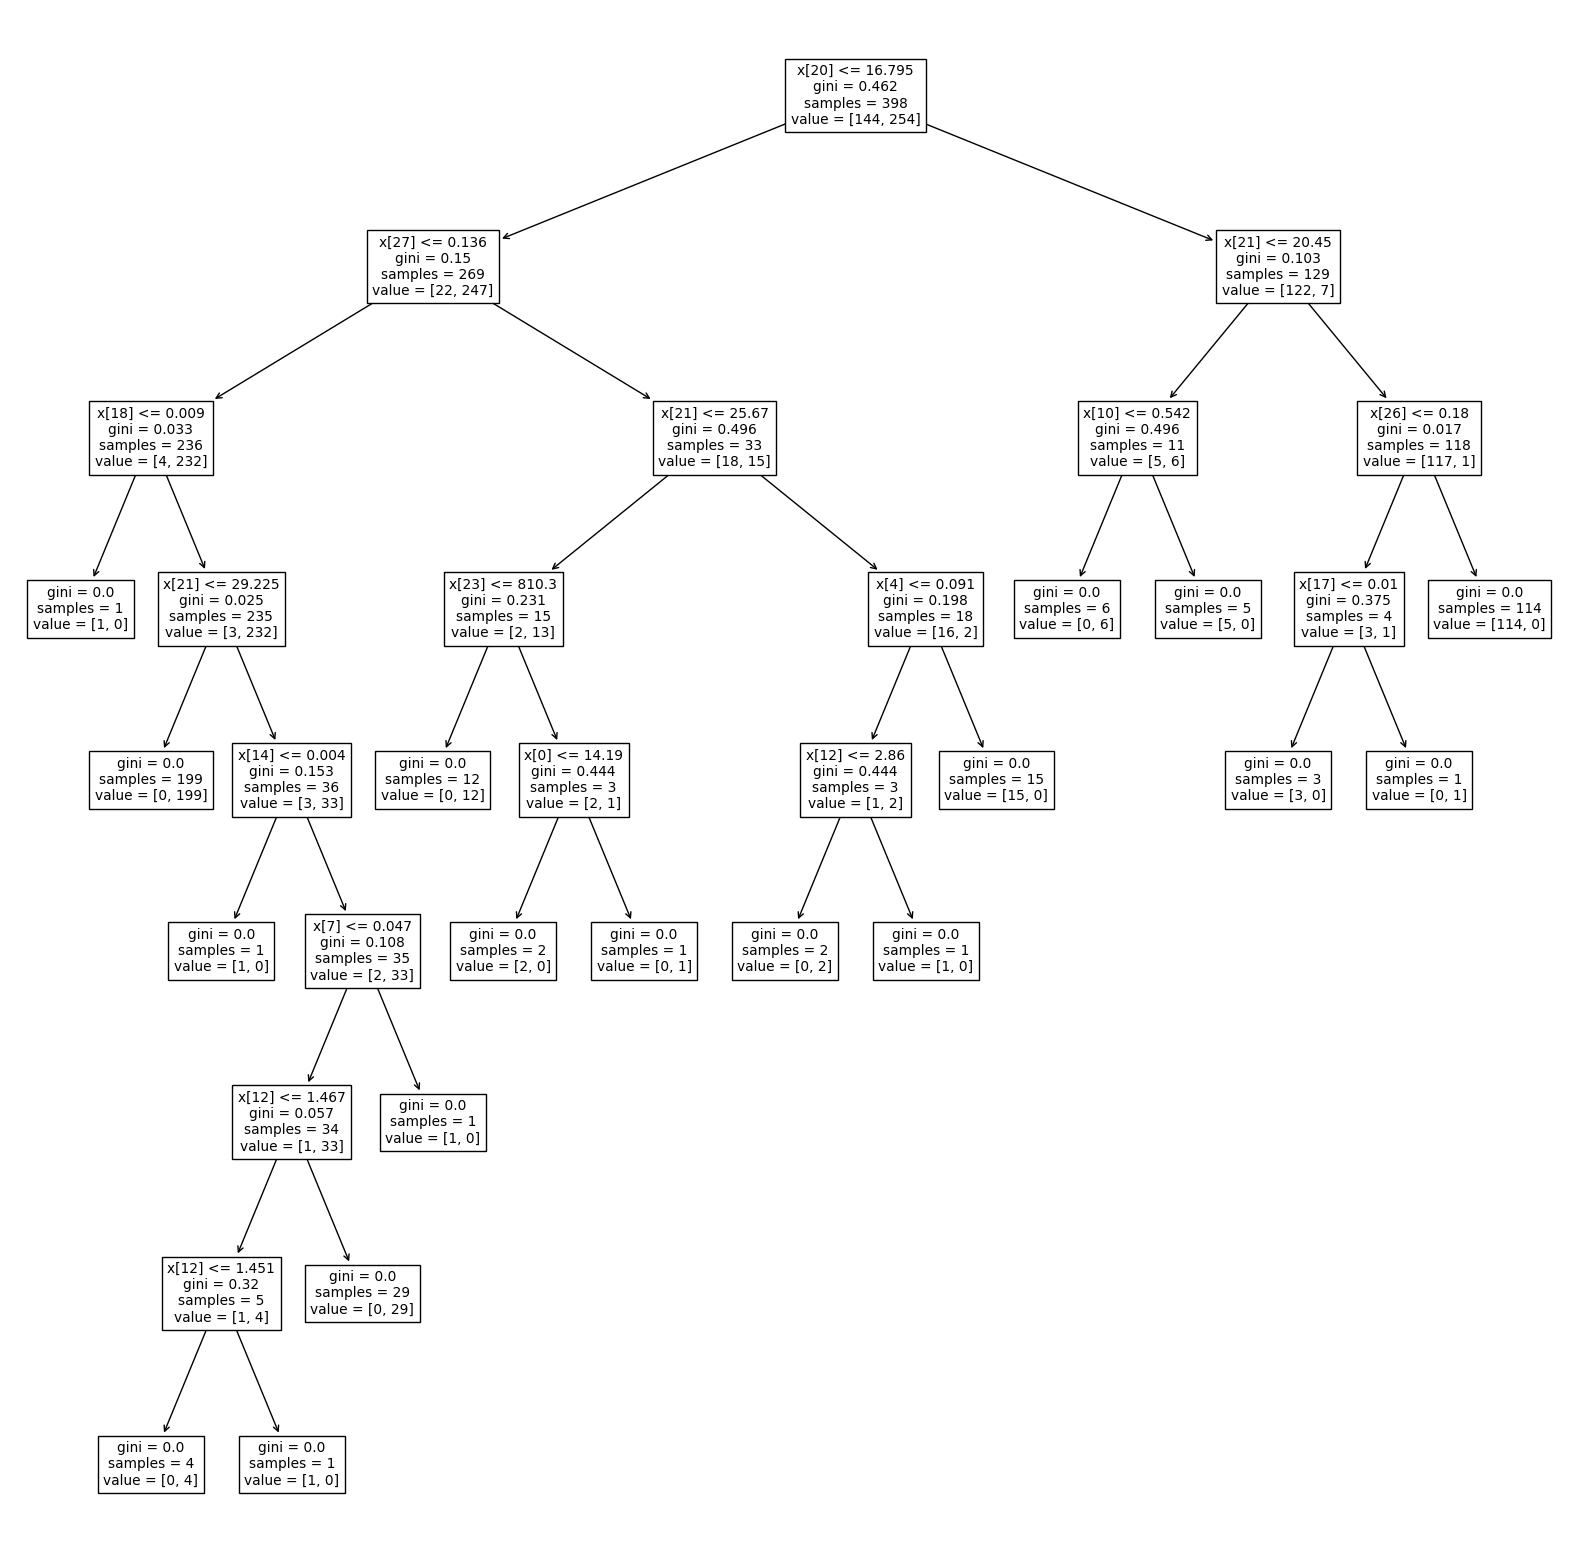

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plot_tree(tree_model)
plt.show()

En conclusión, para el problema planteado que consiste en la detección de cáncer a partir de la descripción de los tumores, el algoritmo que tuvo mejor desempeño fue la regresión logística. Esto se puede deber a que las descripciones son numéricas (radio, perímetro, textura) y la regresión logística maneja bien este tipo de datos, pues pondera los valores numéricos al multiplicarlos por pesos. Mientras que los árboles de decisión, por ejemplo, manejan mejor datos categóricos de respuesta sí o no. Asimismo, el modelo de Bayes Naïve controla los datos por medio de la media y la varianza. Parece entonces que ponderar estos datos multiplicándolos por un valor real tienen mejores resultados que otros métodos.